In [11]:
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle

#import du lieu
with open('money (1).pickle', 'rb') as f:
    (x, y) = pickle.load(f)
# chia du lieu train
x_train = x[:3500]
y_train = y[:3500]

# ep kieu
x_train = x_train.astype('float32')
x_train /= 255
#encoding
y_train = np_utils.to_categorical(y_train, 10)
x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape, y_train.shape)

(3368, 150, 150, 3) (3368, 10)


In [95]:
# tao model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform', padding = 'same', input_shape= (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(10, activation= 'softmax'))
model.summary()
opt = SGD(lr = 0.01, momentum= 0.9)

#compile & train model
model.compile(optimizer= Adam(), loss= 'binary_crossentropy', metrics= 'accuracy')
history = model.fit(x_train, y_train, batch_size= 128, epochs= 10, validation_split= 0.2)


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 18, 18, 128)    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
22/22 [==============================] - 3s 115ms/step - loss: 3.6384 - accuracy: 0.1080 - val_loss: 1.4036 - val_accuracy: 0.0772
Epoch 2/10
22/22 [==============================] - 2s 95ms/step - loss: 0.8311 - accuracy: 0.1381 - val_loss: 0.4993 - val_accuracy: 0.1884
Epoch 3/10
22/22 [==============================] - 2s 95ms/step - loss: 0.4252 - accuracy: 0.2906 - val_loss: 0.2287 - val_accuracy: 0.4570
Epoch 4/10
22/22 [==============================] - 2s 95ms/step - loss: 0.1673 - accuracy: 0.7082 - val_loss: 0.1225 - val_accuracy: 0.9050
Epoch 5/10
22/22 [==============================] - 2s 95ms/step - loss: 0.1005 - accuracy: 0.9428 - val_loss: 0.0882 - val_accuracy: 0.9362
Epoch 6/10
22/22 [==============================] - 2s 95ms/step - loss: 0.0739 - accuracy: 0.9588 - val_loss: 0.0651 - val_accuracy: 0.9688
Epoch 7/10
22/22 [==============================] - 2s 96ms/step - loss: 0.0544 - accuracy: 0.9729 - val_loss: 0.0492 - val_accuracy: 0.9748
Epoch 8/10
2

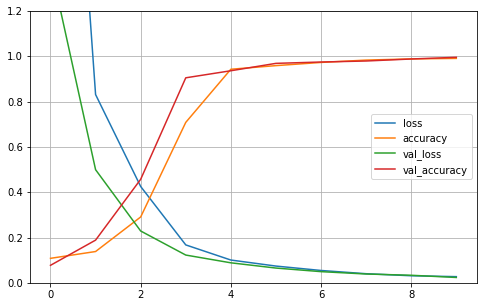

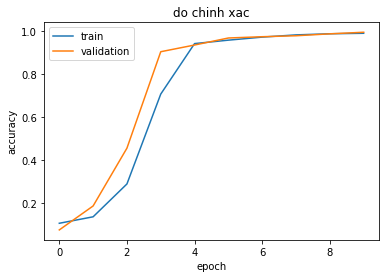

In [97]:
#ve do thi 
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('do chinh xac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Day la 500000 vnd
9


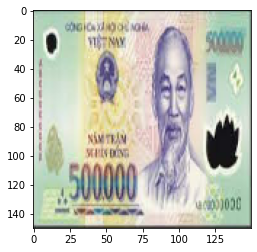

Day la 5000 vnd
3


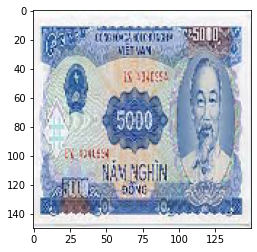

In [98]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
label = ['500vnd', '1000 vnd', '2000 vnd', '5000 vnd', '10000 vnd', '20000 vnd', '50000 vnd', '100000 vnd', '200000 vnd', '500000 vnd']
def predict(image):
  img = load_img(f'{image}.jfif', target_size = (150, 150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  img /= 255
  
  pred = int(np.argmax(model.predict(img), axis = 1))
  for i in range(10):
    if i == pred:
      print(f'Day la {label[i]}')
  print(pred)
  plt.show()
predict('500k')
predict('5000')


In [50]:
from google.colab import files
upload = files.upload()

Saving 20k.jfif to 20k.jfif
